<a href="https://colab.research.google.com/github/EllieV01/uni_docs/blob/main/%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B1%D1%83%D0%BA%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip -q /content/drive/MyDrive/Colab_Notebooks/Cyrillic1.zip -d /content/sample_data

In [ ]:
!unzip -q /content/drive/MyDrive/Colab_Notebooks/test.zip -d /content/sample_data

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline 

In [ ]:
batch_size=256
image_size=(278, 278)

In [ ]:
train_dataset = image_dataset_from_directory('Cyrillic1',
                                             subset='training',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size)
validation_dataset = image_dataset_from_directory('Cyrillic1',
                                             subset='validation',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 15215 files belonging to 33 classes.
Using 13694 files for training.
Found 15215 files belonging to 33 classes.
Using 1521 files for validation.


In [ ]:
class_names = train_dataset.class_names
class_names

In [ ]:
plt.figure(figsize=(8, 8))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
test_dataset = image_dataset_from_directory('test',
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 66 files belonging to 33 classes.


In [ ]:
test_dataset.class_names

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Создаем последовательную модель
model = Sequential()

# Сверточный слой
model.add(Conv2D(8, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(512, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Полносвязная часть нейронной сети для классификации
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
# Выходной слой, 33 нейрон по количеству классов
model.add(Dense(33, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, 
                    validation_data=validation_dataset,
                    epochs=30,
                    verbose=2)

Epoch 1/30
54/54 - 24s - loss: 3.3195 - accuracy: 0.1499 - val_loss: 1.4203 - val_accuracy: 0.5832 - 24s/epoch - 447ms/step
Epoch 2/30
54/54 - 23s - loss: 0.9542 - accuracy: 0.7087 - val_loss: 0.5682 - val_accuracy: 0.8192 - 23s/epoch - 431ms/step
Epoch 3/30
54/54 - 23s - loss: 0.3954 - accuracy: 0.8781 - val_loss: 0.2845 - val_accuracy: 0.9165 - 23s/epoch - 433ms/step
Epoch 4/30
54/54 - 23s - loss: 0.2267 - accuracy: 0.9319 - val_loss: 0.2704 - val_accuracy: 0.9204 - 23s/epoch - 431ms/step
Epoch 5/30
54/54 - 24s - loss: 0.1491 - accuracy: 0.9539 - val_loss: 0.2478 - val_accuracy: 0.9270 - 24s/epoch - 437ms/step
Epoch 6/30
54/54 - 23s - loss: 0.0988 - accuracy: 0.9702 - val_loss: 0.2191 - val_accuracy: 0.9402 - 23s/epoch - 429ms/step
Epoch 7/30
54/54 - 23s - loss: 0.0907 - accuracy: 0.9717 - val_loss: 0.2311 - val_accuracy: 0.9343 - 23s/epoch - 432ms/step
Epoch 8/30
54/54 - 23s - loss: 0.0766 - accuracy: 0.9746 - val_loss: 0.2183 - val_accuracy: 0.9454 - 23s/epoch - 428ms/step
Epoch 9/

In [ ]:
scores = model.evaluate(test_dataset, verbose=1)

1/1 [==============================] - 0s 135ms/step - loss: 0.0954 - accuracy: 0.9848


In [ ]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 98.4848


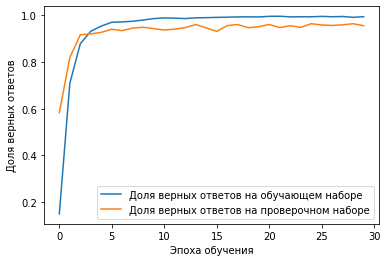

In [ ]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

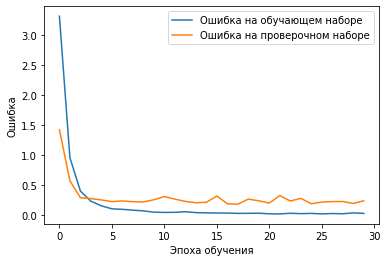

In [ ]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()